# SciPy

**SciPy** è una libreria open-source per il calcolo scientifico in Python. Estende le funzionalità di **NumPy**, fornendo strumenti avanzati per:

- Algebra lineare
- Ottimizzazione
- Integrazione
- Statistica
- Elaborazione del segnale
- Interpolazione
- Calcolo numerico

SciPy è organizzata in moduli, ognuno specializzato in un ambito del calcolo scientifico, come `scipy.linalg`, `scipy.optimize`, `scipy.integrate`, ecc.

## Principali Moduli e Usi

1. Algebra Lineare (`scipy.linalg`)
Offre operazioni avanzate sulle matrici.

2. Ottimizzazione (`scipy.optimize`)
Minimizzazione di funzioni, risoluzione di equazioni.

3. Integrazione Numerica (`scipy.integrate`)
Integrazione definita e risoluzione di ODE.

4. Statistica (`scipy.stats`)
Distribuzioni, test statistici, misure descrittive.

5. Interpolazione (`scipy.interpolate`)
Costruzione di funzioni continue da dati discreti.

6. Trasformate di Fourier, Filtro (`scipy.fft`, `scipy.signal`)
Analisi nel dominio della frequenza, filtraggio.


In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import scipy as sp
import math

## Algebra lineare

In [4]:
A = np.array([[3, 2], [1, 4]])
b = np.array([6, 5])
x = sp.linalg.solve(A, b)
x

array([1.4, 0.9])

# Ottimizzazione

In [11]:
# Ottimizzazione: minimo di una funzione
f = lambda x: x**2 + 10
res = sp.optimize.minimize(f, x0=1)
res

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 10.0
        x: [-9.442e-09]
      nit: 2
      jac: [ 0.000e+00]
 hess_inv: [[ 5.000e-01]]
     nfev: 6
     njev: 3

### Ottimizzazione scalare e multivariata con SciPy

Vediamo come usare le funzioni di ottimizzazione di SciPy per minimizzare funzioni sia scalari che multivariate.

Funzione scalare: $f(x) = x^2 + 10\sin(x)$
Definiamo la funzione e la visualizziamo per identificare i minimi locali e globali.

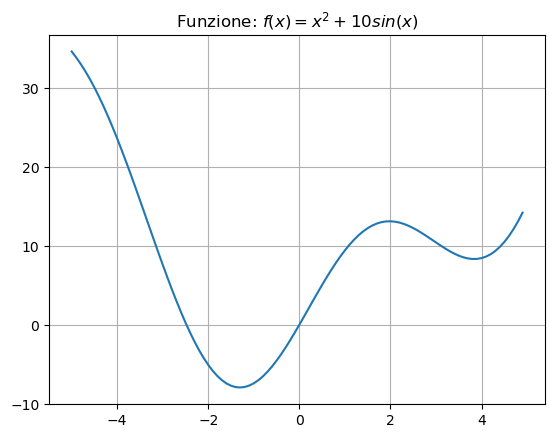

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize as sp

# Definiamo una funzione scalare: f(x) = x^2 + 10*sin(x)
def f(x):
    return x**2 + 10 * np.sin(x)

# Visualizzazione della funzione
x = np.arange(-5, 5, 0.1)
plt.plot(x, f(x))
plt.title("Funzione: $f(x) = x^2 + 10sin(x)$")
plt.grid(True)

In [18]:
# Minimo locale vicino a x = -1.3 usando minimize_scalar con bounds
res = sp.minimize_scalar(f)
res

 message: 
          Optimization terminated successfully;
          The returned value satisfies the termination criteria
          (using xtol = 1.48e-08 )
 success: True
     fun: -7.945823375615284
       x: -1.3064400120612139
     nit: 9
    nfev: 13

`res.fun`: è il valore minimo della funzione che l'algoritmo dice di aver trovato

`res.x`: è il punto in cui è stato trovato il minimo.

`nit`: numero di iterazioni

`nfev`: numero di valutazioni della funzione f(x)

Supponiamo di sapere che il minimo globale si trovi tra -2 e -1. Usiamo `minimize_scalar` con `bounds`.

In [22]:
# Minimo locale vicino a x = -1.3 usando minimize_scalar con bounds
res = sp.minimize_scalar(f, bounds=(-5, 5))
print(res)


 message: Solution found.
 success: True
  status: 0
     fun: -7.94582337561525
       x: -1.3064399324551186
     nit: 9
    nfev: 9


In [20]:
# Verifica che il valore minimo trovato corrisponda a f(res.x)
print("Verifica: ", res.fun == f(res.x))

Verifica:  True


Se non conoscessimo l'intervallo esatto del minimo e magari ci sono molti minimi locali, possiamo usare l'algoritmo globale `differential_evolution` (algoritmo evolutivo, stocastico.), più robusto per funzioni complicate.

In [21]:
# Minimo globale con metodo globale: differential_evolution
bounds = [(-5, 5)]  # Limiti per la ricerca globale

res = sp.differential_evolution(f, bounds=bounds)
print(res)

             message: Optimization terminated successfully.
             success: True
                 fun: -7.945823375615116
                   x: [-1.306e+00]
                 nit: 6
                nfev: 113
          population: [[-1.328e+00]
                       [-1.453e+00]
                       ...
                       [-1.400e+00]
                       [-1.245e+00]]
 population_energies: [-7.946e+00 -7.819e+00 ... -7.894e+00 -7.924e+00]
                 jac: [-1.865e-06]


## Ottimizzazione multivariata
Supponiamo ora di voler minimizzare una funzione di due variabili:

$$f(x_0, x_1) = (x_0 - 1)^2 + (x_1 - 2)^2$$

Utiizziamo `minimize` di SciPy.

In [6]:
# Funzione di due variabili: f(x0, x1) = (x0 - 1)^2 + (x1 - 2)^2
def f(x):
    return (x[0] - 1)**2 + (x[1] - 2)**2

# Ottimizzazione multivariata con guess iniziale
res = sp.minimize(f, x0=[0, 0])
print(res)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 1.7057803420206568e-16
        x: [ 1.000e+00  2.000e+00]
      nit: 2
      jac: [ 3.219e-09 -8.462e-09]
 hess_inv: [[ 9.000e-01 -2.000e-01]
            [-2.000e-01  6.000e-01]]
     nfev: 9
     njev: 3


### Integrazione

Supponiamo di voler calcolare numericamente l'integrale definito:

$$
\int_0^{\pi/2} \sin(t) \, dt
$$

La funzione `scipy.integrate.quad()` sceglie automaticamente una delle varie tecniche adattive in base ai parametri forniti, ed è quindi la **prima scelta consigliata** per l'integrazione di funzioni in una variabile.


In [ ]:
# Integrazione numerica
integrale, stima_errore = sp.integrate.quad(np.sin, 0, np.pi/2)
integrale

0.9999999999999999

Verifica che il risultato numerico sia vicino a quello analitico e minore dell'errore stimato

In [ ]:
np.allclose(integrale, 1), abs(integrale - 1) < stima_errore 



(True, True)

Il modulo `scipy.integrate` include anche funzioni per integrare **equazioni differenziali ordinarie (ODE)**.  
Ad esempio, `scipy.integrate.solve_ivp()` risolve ODE nella forma:

$$
\frac{dy}{dt} = f(t, y(t))
$$

a partire da un tempo iniziale $ t_0 $ e da uno stato iniziale $ y(t = t_0) $, fino a un tempo finale $ t_f $, oppure fino al verificarsi di un evento (ad esempio, il raggiungimento di uno stato specifico).

Esempio: consideriamo il problema:

$$
\frac{dy}{dt} = 2y
\quad \text{con condizione iniziale} \quad y(0) = 1
$$

nell'intervallo $ t = 0 \ldots 4 $.

Iniziamo definendo una funzione chiamabile che calcola $f(t, y(t))$
 dato il tempo e lo stato corrente.


Text(0.5, 1.0, 'Solution of Initial Value Problem')

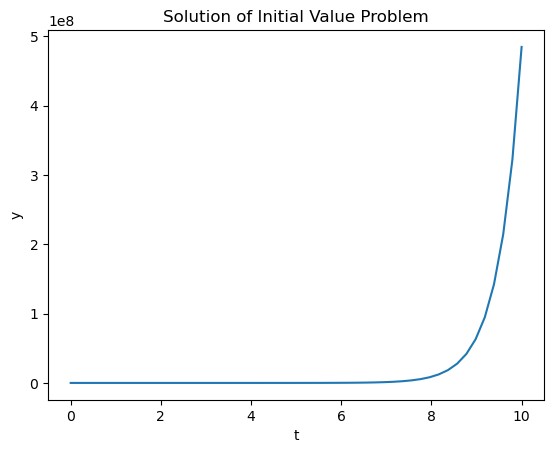

In [ ]:
def f(t, y):
    return 2 * y


t_span = (0, 10) # time interval
t_eval = np.linspace(*t_span) # times at which to evaluate `y`
y0 = [1,] # initial state
res = sp.integrate.solve_ivp(f, t_span=t_span, y0=y0, t_eval=t_eval)

plt.plot(res.t, res.y[0]) 
plt.xlabel('t')
plt.ylabel('y')
plt.title('Solution of Initial Value Problem') 

### Modulo Statistica

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
import scipy as sp
import math

In [ ]:
# Statistica: media, deviazione, test z
data = np.random.normal(loc=5, scale=2, size=1000)
mean = np.mean(data)
std = np.std(data)

### Esempio di campionamento da una distribuzione normale
Consideriamo una variabile casuale distribuita secondo la normale standard. Estraiamo un campione composto da 100.000 osservazioni da questa variabile casuale.

L'istogramma normalizzato del campione è una stima della funzione di densità di probabilità (PDF) della variabile casuale.

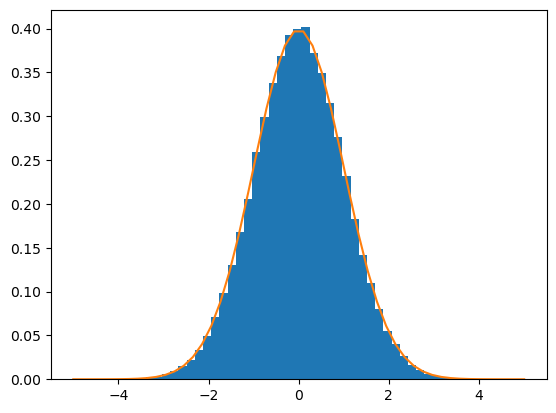

In [ ]:
dist = sp.stats.norm(loc=0, scale=1) # standard normal distribution 
sample = dist.rvs(size=100000) # "random variate sample"
plt.hist(sample, bins=50, density=True, label='normalized histogram') 
x = np.linspace(-5, 5)
plt.plot(x, dist.pdf(x), label='PDF')

Oggetti di distribuzione e distribuzioni "congelate"
Ognuna delle oltre 100 famiglie di distribuzioni in scipy.stats è rappresentata da un oggetto con un metodo __call__. 

Qui, abbiamo utilizzato l’oggetto scipy.stats.norm per specificare la sua posizione (media) e scala (deviazione standard), e questo restituisce una distribuzione congelata: un’istanza specifica della famiglia di distribuzioni, con tutti i parametri fissati.

L’oggetto della distribuzione congelata dispone di metodi per calcolare le funzioni fondamentali della distribuzione specifica.

Supponiamo di sapere che il campione è stato estratto da una distribuzione appartenente alla famiglia delle normali, ma di non conoscere media e deviazione standard della distribuzione specifica. Possiamo stimare questi parametri tramite massima verosimiglianza usando il metodo fit della famiglia di distribuzioni:

In [ ]:
loc, scale = sp.stats.norm.fit(sample)
loc, scale

(np.float64(0.0014195103260612604), np.float64(0.9973164705556199))

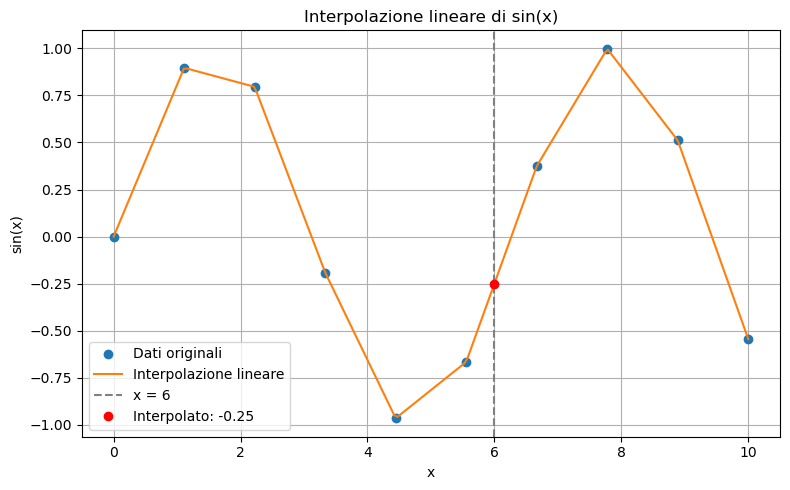

In [ ]:
# Interpolazione
x = np.linspace(0, 10, 10)
y = np.sin(x)

# Interpolazione lineare
f_interp = sp.interpolate.interp1d(x, y)
x_dense = np.linspace(0, 10, 200)
y_interp = f_interp(x_dense)

# Valore interpolato in un punto non presente nei dati originali
val = f_interp(6)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(x, y, 'o', label='Dati originali')
plt.plot(x_dense, y_interp, '-', label='Interpolazione lineare')
plt.axvline(6, color='gray', linestyle='--', label='x = 6')
plt.plot(6, val, 'ro', label=f'Interpolato: {val:.2f}')
plt.xlabel("x")
plt.ylabel("sin(x)")
plt.title("Interpolazione lineare di sin(x)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

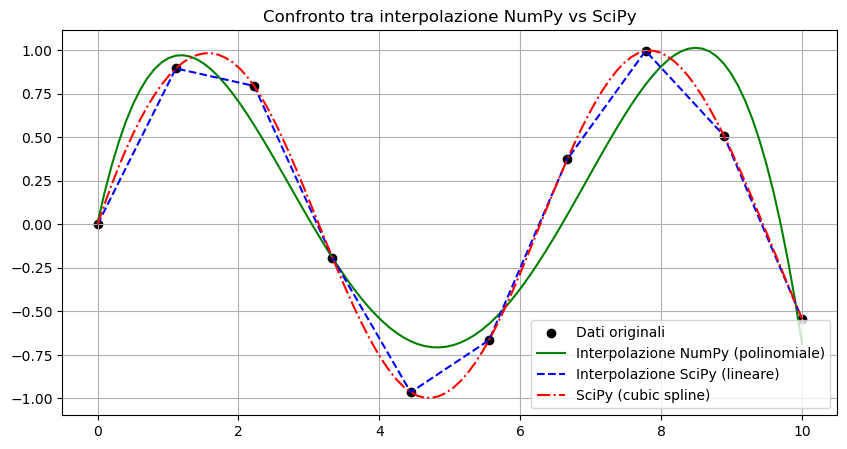

In [ ]:
# Dati 
x = np.linspace(0, 10, 10)
y = np.sin(x)
x_interp = np.linspace(0, 10, 100)  # Punti dove interpolare

# Interpolazione polinomiale 
coeffs = np.polyfit(x, y, deg=4)
y_np_interp = np.polyval(coeffs, x_interp)
from scipy.interpolate import interp1d

# Interpolazione lineare
f_linear = interp1d(x, y, kind='linear')
y_scipy_interp = f_linear(x_interp)
# Interpolazione spline cubica con SciPy
f_cubic = interp1d(x, y, kind='cubic')
y_cubic = f_cubic(x_interp)
plt.figure(figsize=(10, 5))
plt.scatter(x, y, label="Dati originali", color='black')
plt.plot(x_interp, y_np_interp, label="Interpolazione NumPy (polinomiale)", color='green')
plt.plot(x_interp, y_scipy_interp, label="Interpolazione SciPy (lineare)", linestyle='--', color='blue')
plt.plot(x_interp, y_cubic, label="SciPy (cubic spline)", linestyle='-.', color='red')
plt.legend()
plt.title("Confronto tra interpolazione NumPy vs SciPy")
plt.grid(True)
plt.show()


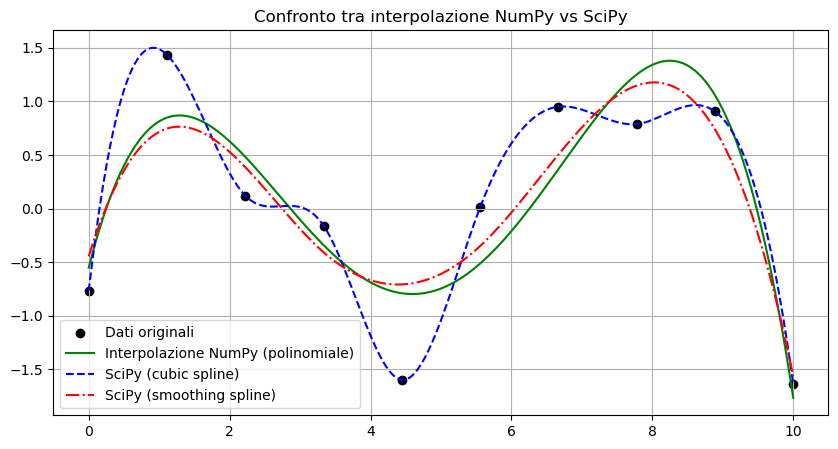

In [ ]:
# Dati 
x = np.linspace(0, 10, 10)
y = np.sin(x) + np.random.normal(scale=1, size=len(x))
x_interp = np.linspace(0, 10, 200)  # Punti dove interpolare


# Interpolazione polinomiale 
coeffs = np.polyfit(x, y, deg=4)
y_np_interp = np.polyval(coeffs, x_interp)


# Interpolazione spline cubica con SciPy
f_cubic = sp.interpolate.interp1d(x, y, kind='cubic')
y_cubic = f_cubic(x_interp)

# Smoothing spline con SciPy
spline = sp.interpolate.UnivariateSpline(x, y, s=2)  # Il parametro s controlla la "levigatezza"
y_smooth = spline(x_interp)
plt.figure(figsize=(10, 5))
plt.scatter(x, y, label="Dati originali", color='black')
plt.plot(x_interp, y_np_interp, label="Interpolazione NumPy (polinomiale)", color='green')
plt.plot(x_interp, y_cubic, label="SciPy (cubic spline)", linestyle='--', color='blue')
plt.plot(x_interp, y_smooth, label="SciPy (smoothing spline)", linestyle='-.', color='red')
plt.legend()
plt.title("Confronto tra interpolazione NumPy vs SciPy")
plt.grid(True)
plt.show()
